In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [11]:
data = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))
print(data)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [12]:
print(data.shape)
print(data.info())

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

## **General**

In [13]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [15]:
print(data.select_dtypes(include=['object']).dtypes)
print(data.select_dtypes(include=['int64']).dtypes)

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object
Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompan

In [16]:
cat_cols = data.select_dtypes('object').columns
for cat in cat_cols:
    print(cat ,'-> ' , data[cat].unique())
    print()

Attrition ->  ['Yes' 'No']

BusinessTravel ->  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department ->  ['Sales' 'Research & Development' 'Human Resources']

EducationField ->  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender ->  ['Female' 'Male']

JobRole ->  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus ->  ['Single' 'Married' 'Divorced']

Over18 ->  ['Y']

OverTime ->  ['Yes' 'No']



In [17]:
#Replace 'Attrition', 'OverTime', 'Over18' columns with integer as those columns could be useful
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
data['Over18'] = data['Over18'].apply(lambda x:1 if x == 'Y' else 0)
data['Gender'] = data['Gender'].apply(lambda x:1 if x == 'Female' else 0)

In [18]:
others = data.select_dtypes('object').columns
others

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in others:
    data[col] = le.fit_transform(data[col])

In [20]:
no_use = []
for col in data.columns:
    if(len(data[col].unique()) ==1):
        no_use.append(col)

no_use.append('EmployeeNumber')
print(no_use)
data.drop(columns = no_use , axis = 1 , inplace = True)


['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


In [21]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,0,...,3,4,1,6,3,3,2,2,2,2


0    1233
1     237
Name: Attrition, dtype: int64


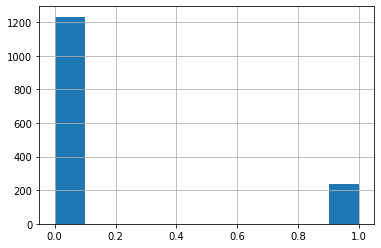

In [22]:
print(data['Attrition'].value_counts())
data['Attrition'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79d83e1ac0>,
      dtype=object)

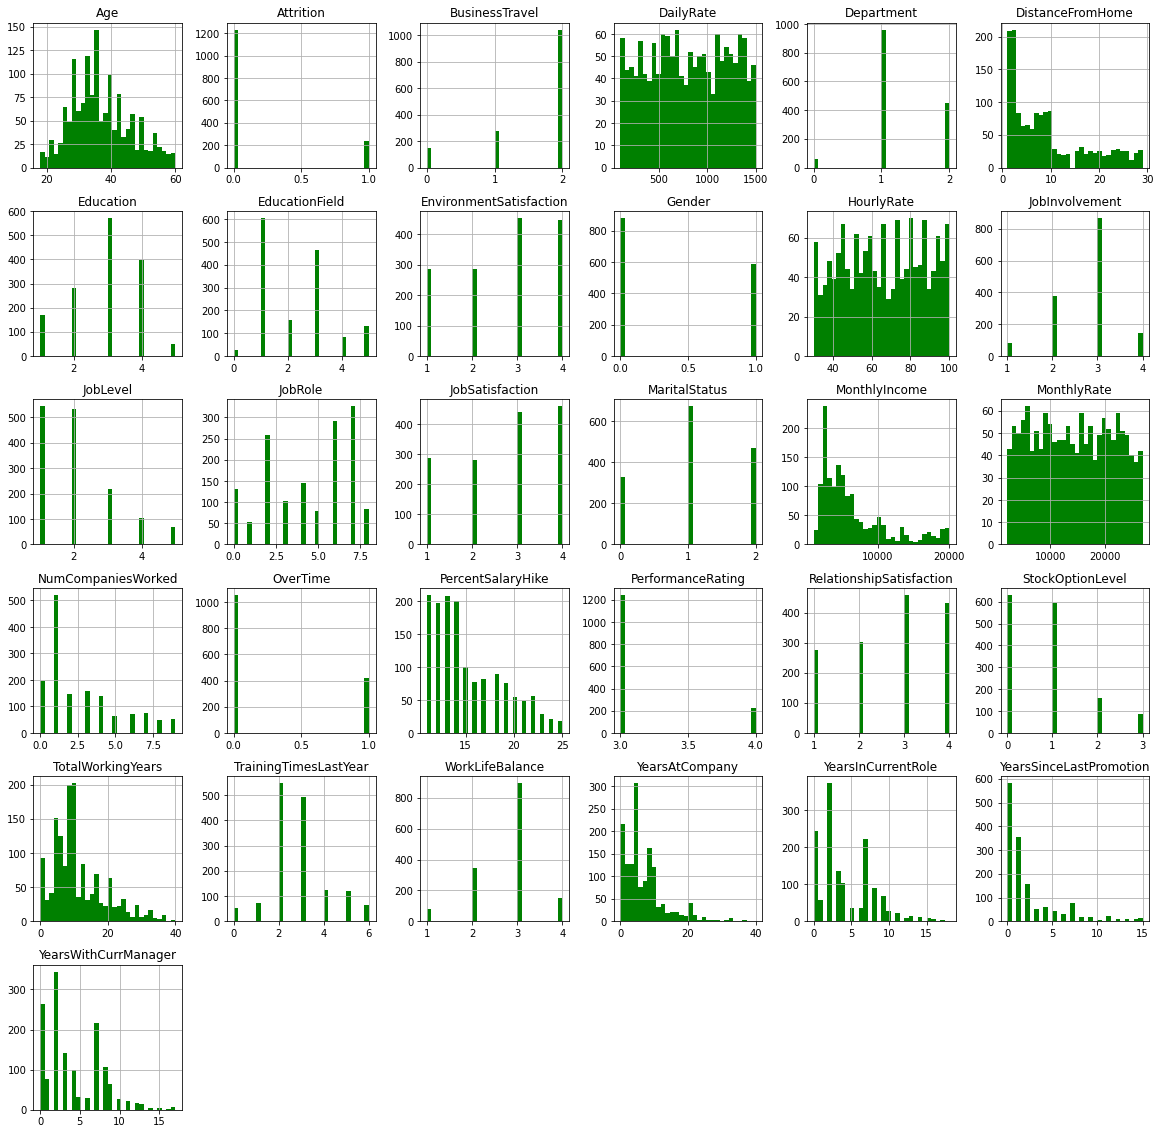

In [23]:
data.hist(bins = 30, figsize = (20,20), color = 'g')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

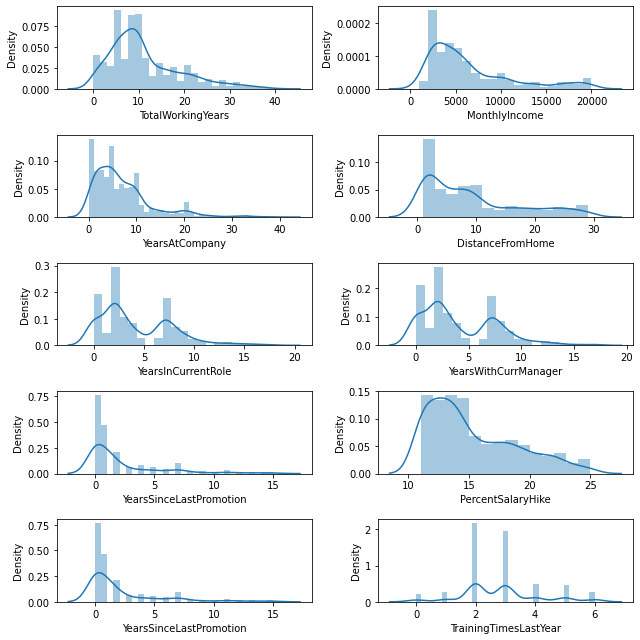

In [24]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(data['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(data['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(data['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(data['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(data['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(data['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(data['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(data['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

In [25]:
left = data[data['Attrition'] == 1]
stay = data[data['Attrition'] == 0]

print('Total Employees = ', len(data))
print('Number of Employees Who Left = ', len(left))
print('% of Employees Who Left = ', 1*len(left)/len(data)*100,'%')

print('Number of Employees Who Stay = ', len(stay))
print('% of Employees Who Stay = ', 1*len(stay)/len(data)*100,'%')

Total Employees =  1470
Number of Employees Who Left =  237
% of Employees Who Left =  16.122448979591837 %
Number of Employees Who Stay =  1233
% of Employees Who Stay =  83.87755102040816 %


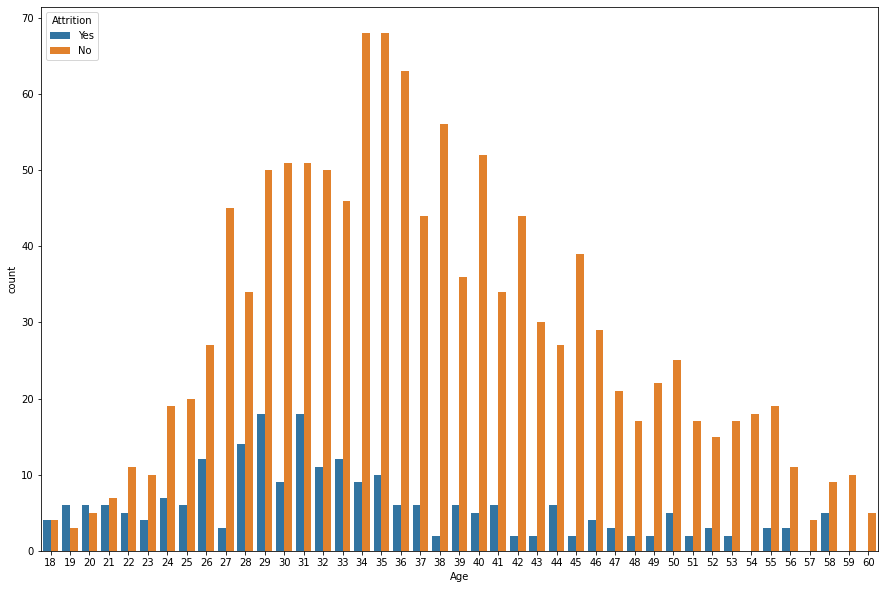

In [6]:
plt.figure(figsize = [15,10])
sns.countplot(x = 'Age', hue = 'Attrition', data = data)

<ipython-input-8-e77ef7553d93>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(413)


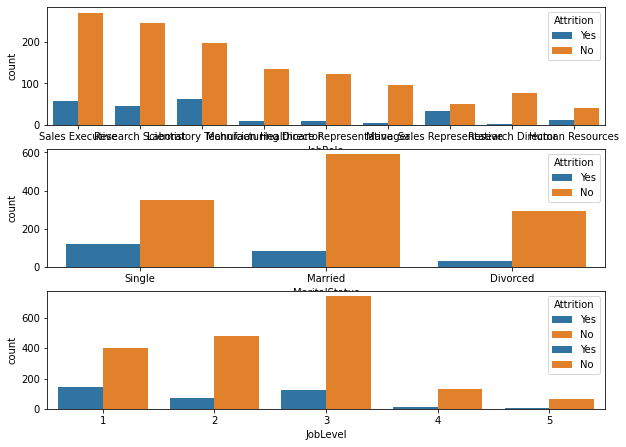

In [8]:
plt.figure(figsize = [10,10])

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)

plt.subplot(413)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)

Text(0.5, 0, 'Total Working Years')

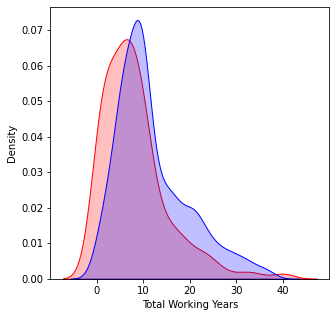

In [26]:
plt.figure(figsize = [5,5])
sns.kdeplot(left['TotalWorkingYears'], label = 'Employee who left', shade = True, color = 'r')
sns.kdeplot(stay['TotalWorkingYears'], label = 'Employee who stay', shade = True, color = 'b')

plt.xlabel('Total Working Years')

Text(0.5, 0, 'Distance from Home')

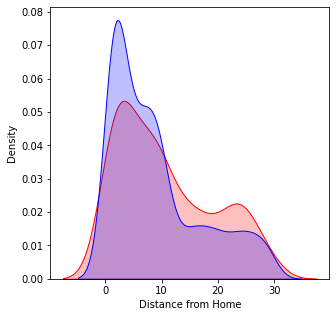

In [27]:
plt.figure(figsize = [5,5])
sns.kdeplot(left['DistanceFromHome'], label = 'Employee who left', shade = True, color = 'r')
sns.kdeplot(stay['DistanceFromHome'], label = 'Employee who stay', shade = True, color = 'b')

plt.xlabel('Distance from Home')


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


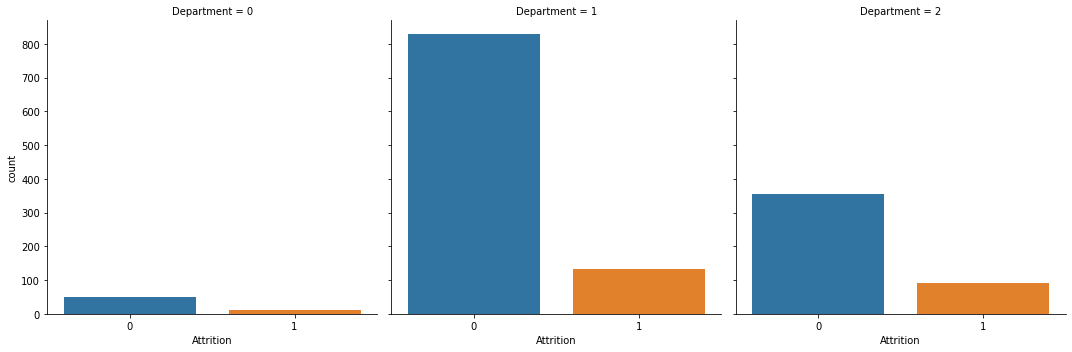

In [29]:
sns.factorplot(data=data,kind='count',x='Attrition',col='Department')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


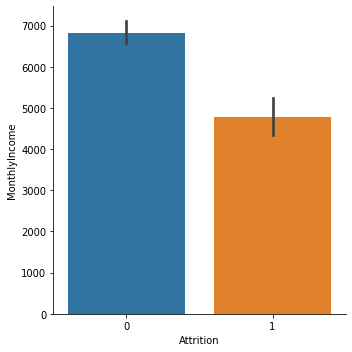

In [31]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='MonthlyIncome')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

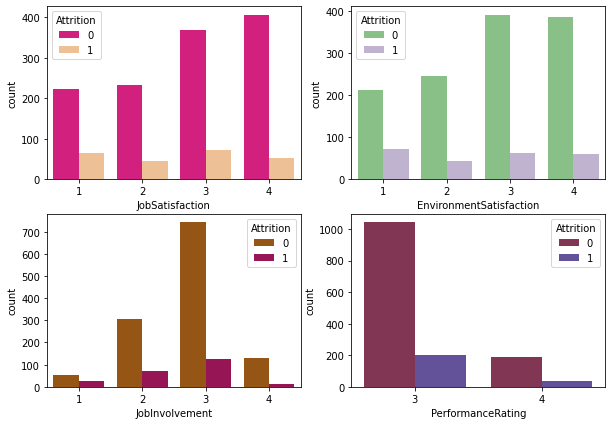

In [33]:
plt.figure(figsize =(10 ,7))
plt.subplot(2,2,1)
sns.countplot(data['JobSatisfaction'] ,hue =data['Attrition'] ,palette='Accent_r')
plt.subplot(2,2,2)
sns.countplot(data['EnvironmentSatisfaction'] ,hue =data['Attrition'] ,palette='Accent')
plt.subplot(2,2,3)
sns.countplot(data['JobInvolvement'] ,hue =data['Attrition'] ,palette='brg_r')
plt.subplot(2,2,4)
sns.countplot(data['PerformanceRating'] ,hue =data['Attrition'] ,palette='twilight_r')

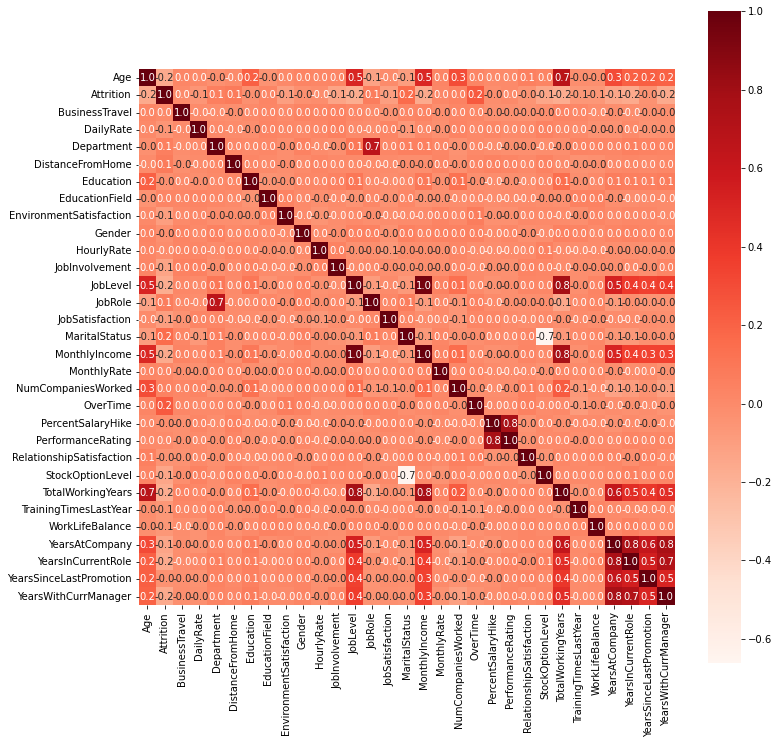

In [ ]:
corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [ ]:
x = data.drop('Attrition', axis=1)
y = data['Attrition']
print(x.shape)
print(y.shape)

(1470, 30)
(1470,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.75, random_state = 42, stratify = y)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1470, 30)
(1102, 30)
(368, 30)


In [ ]:
print('Training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('Test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

Training data has 1102 observation with 30 features
Test data has 368 observation with 30 features


In [ ]:
x_train_o= x_train
y_train_o= y_train
x_test_o = x_test
y_test_o = y_test

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)
print(x_train.shape)
print(y_train.shape)

(1848, 30)
(1848,)


In [ ]:
print('Training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('Test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

Training data has 1848 observation with 30 features
Test data has 368 observation with 30 features


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
knn_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of KNN = {} '.format(knn_accuracy))

Accuracy of KNN = 0.6059782608695652 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    knn_accuracy = metrics.accuracy_score(y_test, y_predict)
    print('Accuracy of KNN for' , i, 'neighoburs' , knn_accuracy)

Accuracy of KNN for 1 neighoburs 0.6793478260869565
Accuracy of KNN for 2 neighoburs 0.7309782608695652
Accuracy of KNN for 3 neighoburs 0.6385869565217391
Accuracy of KNN for 4 neighoburs 0.6793478260869565
Accuracy of KNN for 5 neighoburs 0.6059782608695652
Accuracy of KNN for 6 neighoburs 0.6521739130434783
Accuracy of KNN for 7 neighoburs 0.6005434782608695
Accuracy of KNN for 8 neighoburs 0.6684782608695652
Accuracy of KNN for 9 neighoburs 0.625


In [ ]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors':[2,3,5,7,9,11,13,15,17,21] 
}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=knn_params, cv= 5, n_jobs=-1, verbose= 0 , scoring = "roc_auc", return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)

print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'n_neighbors': 3}
Best estimators:  KNeighborsClassifier(n_neighbors=3)


now using n_neighbours = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
knn_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of KNN for 3 neighoburs' , knn_accuracy)

print('Confusion matrix: ')
cm_knn = metrics.confusion_matrix(y_test, y_predict)
print(cm_knn)

# Recall Score
recall_knn = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_knn)

# Precision Score
precision_knn = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_knn)

# F1 Score
f1_score_knn = metrics.f1_score(y_test, y_predict, average='binary')
print('F1 Score: ', f1_score_knn)

Accuracy of KNN for 3 neighoburs 0.6385869565217391
Confusion matrix: 
[[209 100]
 [ 33  26]]
Recall Score:  0.4406779661016949
Precision Score:  0.20634920634920634
F1 Score:  0.28108108108108104


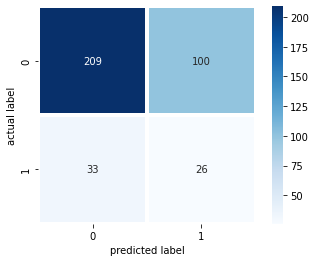

In [ ]:
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
#original data no smote
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_o, y_train_o)
y_predict = knn.predict(x_test_o)
knn_accuracy = metrics.accuracy_score(y_test_o, y_predict)
print('Accuracy of KNN for 3 neighoburs' , knn_accuracy)

print('Confusion matrix: ')
cm_knn = metrics.confusion_matrix(y_test_o, y_predict)
print(cm_knn)

# Recall Score
recall_knn = metrics.recall_score(y_test_o, y_predict)
print('Recall Score: ', recall_knn)

# Precision Score
precision_knn = metrics.precision_score(y_test_o, y_predict)
print("Precision Score: ", precision_knn)

# F1 Score
f1_score_knn = metrics.f1_score(y_test_o, y_predict, average='binary')
print('F1 Score: ', f1_score_knn)

Accuracy of KNN for 3 neighoburs 0.7989130434782609
Confusion matrix: 
[[284  25]
 [ 49  10]]
Recall Score:  0.1694915254237288
Precision Score:  0.2857142857142857
F1 Score:  0.21276595744680848


## **Logistic Regression**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_predict = log.predict(x_test)
log_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Logistic Regression = {} '.format(log_accuracy))

Accuracy of Logistic Regression = 0.6358695652173914 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
          'solver': ['newton-cg', 'liblinear']}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=lr_params, cv= 5, n_jobs=-1, verbose= 0 , scoring = "roc_auc", return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)

In [ ]:
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'C': 0.05, 'penalty': 'l2', 'solver': 'newton-cg'}
Best estimators:  LogisticRegression(C=0.05, solver='newton-cg')


In [ ]:
log = LogisticRegression(C=0.05, solver='newton-cg', penalty='l2')
log.fit(x_train, y_train)
y_predict = log.predict(x_test)
log_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Logistic Regression = {} '.format(log_accuracy))

In [ ]:
log_accuracy = metrics.accuracy_score(y_test, y_predict)*100
print('Accuracy of Logistic Regression = {} '.format(log_accuracy))

# confusion matrix
print('Confusion matrix: ')
cm_log = metrics.confusion_matrix(y_test, y_predict)
print(cm_log)

# Recall Score
recall_log = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_log)

# Precision Score
precision_log = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_log)

# F1 Score
f1_score_log = metrics.f1_score(y_test, y_predict, average='micro')
print('F1 Score: ', f1_score_log)

Accuracy of Logistic Regression = 79.61956521739131 
Confusion matrix: 
[[264  45]
 [ 30  29]]
Recall Score:  0.4915254237288136
Precision Score:  0.3918918918918919
F1 Score:  0.7961956521739132


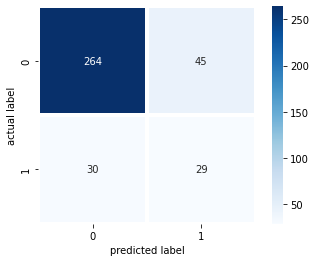

In [ ]:
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
#original data
log = LogisticRegression(C=0.05, solver='newton-cg', penalty='l2')
log.fit(x_train_o, y_train_o)
y_predict_o = log.predict(x_test_o)
log_accuracy_o = metrics.accuracy_score(y_test_o, y_predict_o)
print('Accuracy of Logistic Regression = {} '.format(log_accuracy_o))


# confusion matrix
print('Confusion matrix: ')
cm_log = metrics.confusion_matrix(y_test_o, y_predict_o)
print(cm_log)

# Recall Score
recall_log = metrics.recall_score(y_test_o, y_predict_o)
print('Recall Score: ', recall_log)

# Precision Score
precision_log = metrics.precision_score(y_test_o, y_predict_o)
print("Precision Score: ", precision_log)

# F1 Score
f1_score_log = metrics.f1_score(y_test_o, y_predict_o, average='micro')
print('F1 Score: ', f1_score_log)

Accuracy of Logistic Regression = 0.8695652173913043 
Confusion matrix: 
[[304   5]
 [ 43  16]]
Recall Score:  0.2711864406779661
Precision Score:  0.7619047619047619
F1 Score:  0.8695652173913043


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
randomForest = RandomForestClassifier(n_estimators= 100)
randomForest.fit(x_train, y_train)
y_predict = randomForest.predict(x_test)
forest_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Random Forest = {} '.format(forest_accuracy))

Accuracy of Random Forest = 0.8070652173913043 


In [ ]:
# hyperparameter tuning for random forest
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=grid, cv= 5, n_jobs=-1, verbose= 0 , scoring = "roc_auc", return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)

In [ ]:
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}
Best estimators:  RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200,
                       random_state=18)


In [ ]:
randomForest = RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200,random_state=18)

randomForest.fit(x_train, y_train)
y_predict = randomForest.predict(x_test)
forest_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Random Forest = {} '.format(forest_accuracy))

Accuracy of Random Forest = 0.8097826086956522 


Confusion matrix: 
[[275  34]
 [ 36  23]]
Recall Score:  0.3898305084745763
Precision Score:  0.40350877192982454
F1 Score:  0.8097826086956522


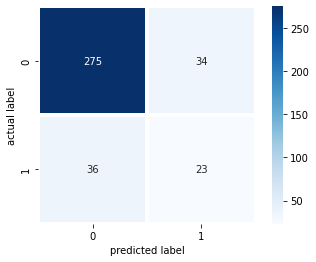

In [ ]:
# confusion matrix
print('Confusion matrix: ')
cm_rf = metrics.confusion_matrix(y_test, y_predict)
print(cm_rf)

# Recall Score
recall_rf = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_rf)

# Precision Score
precision_rf = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_rf)

# F1 Score
f1_score_rf = metrics.f1_score(y_test, y_predict, average='micro')
print('F1 Score: ', f1_score_rf)

sns.heatmap(cm_rf, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

Accuracy of Random Forest = 0.8288043478260869 
Confusion matrix: 
[[301   8]
 [ 55   4]]
Recall Score:  0.06779661016949153
Precision Score:  0.3333333333333333
F1 Score:  0.828804347826087


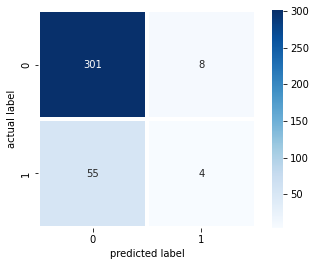

In [ ]:
#original data
randomForest = RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200,random_state=18)

randomForest.fit(x_train_o, y_train_o)
y_predict = randomForest.predict(x_test_o)
forest_accuracy = metrics.accuracy_score(y_test_o, y_predict)
print('Accuracy of Random Forest = {} '.format(forest_accuracy))
# confusion matrix
print('Confusion matrix: ')
cm_rf = metrics.confusion_matrix(y_test_o, y_predict)
print(cm_rf)

# Recall Score
recall_rf = metrics.recall_score(y_test_o, y_predict)
print('Recall Score: ', recall_rf)

# Precision Score
precision_rf = metrics.precision_score(y_test_o, y_predict)
print("Precision Score: ", precision_rf)

# F1 Score
f1_score_rf = metrics.f1_score(y_test_o, y_predict, average='micro')
print('F1 Score: ', f1_score_rf)

sns.heatmap(cm_rf, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

## **XGBoost**

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_predict4 = model.predict(x_test)
xg_accuracy = metrics.accuracy_score(y_test, y_predict4)
print('Accuracy of XGBoost = {} '.format(xg_accuracy))

Accuracy of XGBoost = 0.8097826086956522 


In [ ]:
# hyperparameter tuning for extreme boosting tree aka xgboost
from sklearn.model_selection import GridSearchCV
params_xgb = {
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [1,5,10,15],
        'n_estimators':[40,60,80],
        'learning_rate':[0.1, 0.3, 0.5]
        }

grid_search = GridSearchCV(estimator = XGBClassifier(), param_grid=params_xgb, cv= 5, n_jobs=-1, verbose= 0 , scoring = "roc_auc", return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 80, 'subsample': 0.8}
Best estimators:  XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=80, subsample=0.8)


In [ ]:
model = XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=80, subsample=0.8)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
xg_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of XGBoost = {} '.format(xg_accuracy))

Accuracy of XGBoost = 0.8179347826086957 


Confusion matrix: 
[[281  28]
 [ 39  20]]
Recall Score:  0.3389830508474576
Precision Score:  0.4166666666666667
F1 Score:  0.8179347826086957


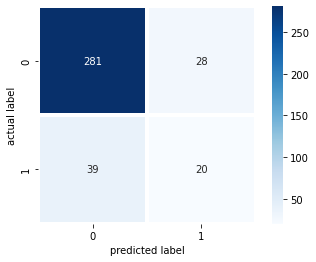

In [ ]:
# confusion matrix
print('Confusion matrix: ')
cm_xg = metrics.confusion_matrix(y_test, y_predict)
print(cm_xg)

# Recall Score
recall_xg = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_xg)

# Precision Score
precision_xg = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_xg)

# F1 Score
f1_score_xg = metrics.f1_score(y_test, y_predict, average='micro')
print('F1 Score: ', f1_score_xg)

sns.heatmap(cm_xg, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

Accuracy of XGBoost = 0.8342391304347826 
Confusion matrix: 
[[294  15]
 [ 46  13]]
Recall Score:  0.22033898305084745
Precision Score:  0.4642857142857143
F1 Score:  0.8342391304347826


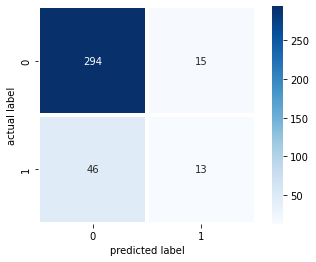

In [ ]:
#original data
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=80, subsample=0.8)
model.fit(x_train_o, y_train_o)
y_predict = model.predict(x_test_o)
xg_accuracy = metrics.accuracy_score(y_test_o, y_predict)
print('Accuracy of XGBoost = {} '.format(xg_accuracy))

# confusion matrix
print('Confusion matrix: ')
cm_xg = metrics.confusion_matrix(y_test_o, y_predict)
print(cm_xg)

# Recall Score
recall_xg = metrics.recall_score(y_test_o, y_predict)
print('Recall Score: ', recall_xg)

# Precision Score
precision_xg = metrics.precision_score(y_test_o, y_predict)
print("Precision Score: ", precision_xg)

# F1 Score
f1_score_xg = metrics.f1_score(y_test_o, y_predict, average='micro')
print('F1 Score: ', f1_score_xg)

sns.heatmap(cm_xg, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()


featurre importance

In [ ]:
importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

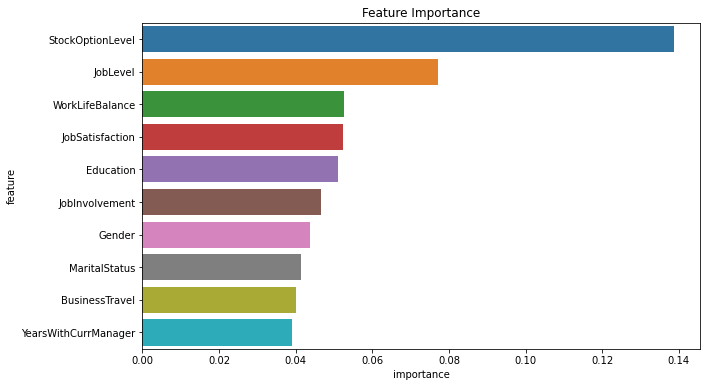

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


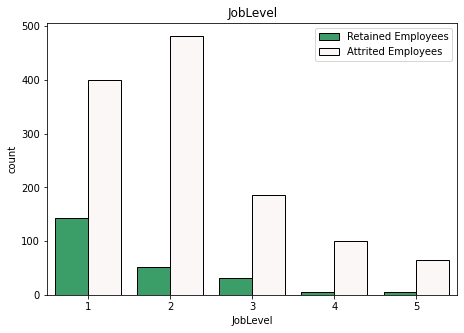

In [ ]:
colors = ['#2BAE66','#FCF6F5']
fig = plt.subplots(nrows = 1,figsize = (25,5))
plt.subplot(1,3,1)
ax = sns.countplot('JobLevel',data = data, hue = 'Attrition', palette = colors,edgecolor = 'black')
#for rect in ax.patches:
#    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobLevel');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


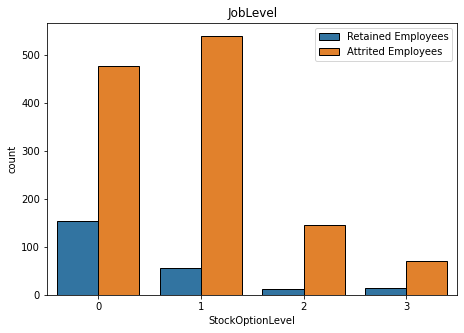

In [ ]:
colors = ['#2BAE66','#FCF6F5']
fig = plt.subplots(nrows = 1,figsize = (25,5))
plt.subplot(1,3,1)
ax = sns.countplot('StockOptionLevel',data = data, hue = 'Attrition',edgecolor = 'black')
#for rect in ax.patches:
#    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobLevel');

## **Adboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [ ]:
ada = AdaBoostClassifier(n_estimators=130, learning_rate=1.3, random_state=42, algorithm='SAMME')
ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.3, n_estimators=130,
                   random_state=42)

In [ ]:
y_pred = ada.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8016304347826086


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       309
           1       0.41      0.54      0.47        59

    accuracy                           0.80       368
   macro avg       0.66      0.70      0.67       368
weighted avg       0.83      0.80      0.81       368



In [ ]:
importance_df = pd.DataFrame({
    'feature': x_test.columns,
    'importance': ada.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
15,MonthlyIncome,0.088700
1,BusinessTravel,0.064479
29,YearsWithCurrManager,0.064366
10,JobInvolvement,0.057709
16,MonthlyRate,0.053162
9,HourlyRate,0.052584
0,Age,0.052345
12,JobRole,0.042473
2,DailyRate,0.039723
21,RelationshipSatisfaction,0.039520


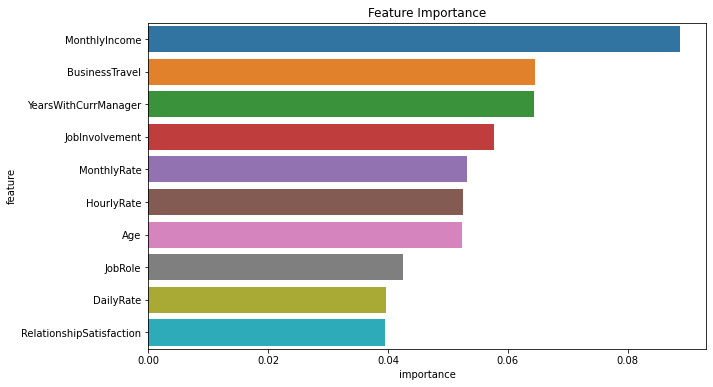

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## **Stacked**

In [ ]:
%pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=34f377ddda51f35d8bdbd414f64203cf224777ff2f6eb971b3b588ad916f3c99
  Stored in directory: /root/.cache/pip/wheels/17/89/0b/21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [ ]:
models = [
    KNeighborsClassifier(n_neighbors=3,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [ ]:
S_train, S_test = stacking(models,                   
                           x_train, y_train.values.ravel(), x_test,   
                           regression=False, 
                           mode='oof_pred_bag', 
                           needs_proba=False,
                           save_dir=None, 
                           metric=accuracy_score, 
                           n_folds=4,
                           stratified=True,
                           shuffle=True,  
                           random_state=0,
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.73376623]
    fold  1:  [0.76839827]
    fold  2:  [0.79004329]
    fold  3:  [0.78354978]
    ----
    MEAN:     [0.76893939] + [0.02177316]
    FULL:     [0.76893939]

model  1:     [RandomForestClassifier]
    fold  0:  [0.82683983]
    fold  1:  [0.81601732]
    fold  2:  [0.81601732]
    fold  3:  [0.82251082]
    ----
    MEAN:     [0.82034632] + [0.00459160]
    FULL:     [0.82034632]

model  2:     [XGBClassifier]
    fold  0:  [0.88311688]
    fold  1:  [0.91125541]
    fold  2:  [0.89177489]
    fold  3:  [0.90909091]
    ----
    MEAN:     [0.89880952] + [0.01179356]
    FULL:     [0.89880952]



In [ ]:
model = XGBClassifier(random_state=0,silent=True)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.82065217]


Confusion matrix: 
[[282  27]
 [ 39  20]]
Recall Score:  0.3389830508474576
Precision Score:  0.425531914893617
F1 Score:  0.8206521739130435


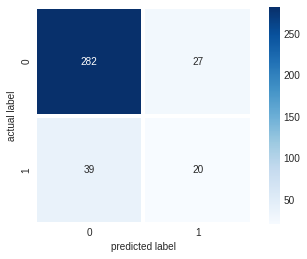

In [ ]:
# confusion matrix
print('Confusion matrix: ')
cm_ = metrics.confusion_matrix(y_test, y_pred)
print(cm_)

# Recall Score
recall_ = metrics.recall_score(y_test, y_pred)
print('Recall Score: ', recall_)

# Precision Score
precision_ = metrics.precision_score(y_test, y_pred)
print("Precision Score: ", precision_)

# F1 Score
f1_score_ = metrics.f1_score(y_test, y_pred, average='micro')
print('F1 Score: ', f1_score_)


# Heatmap Confusion matrix
sns.heatmap(cm_, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

## **Decision Tree Classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [ ]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [ ]:
tree = DecisionTreeClassifier(random_state= 42)
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)
tree_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Decision Tree = {} '.format(tree_accuracy))

Accuracy of Decision Tree = 0.7309782608695652 


In [ ]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,12],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':list(range(1, 16)),
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42, param_grid=params_dt, cv= 5, n_jobs=-1, verbose= 0 , scoring = "roc_auc", return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)


Best Parameters:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 11, 'min_samples_split': 2}
Best estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=11,
                       random_state=42)


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=11,min_samples_split= 2, random_state=42)
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)
tree_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Decision Tree = {} '.format(tree_accuracy))

Accuracy of Decision Tree = 0.7228260869565217 


In [ ]:
# confusion matrix
print('Confusion matrix: ')
cm_tree = metrics.confusion_matrix(y_test, y_predict)
print(cm_tree)

# Recall Score
recall_tree = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_tree)

# Precision Score
precision_tree = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_tree)

# F1 Score
f1_score_tree = metrics.f1_score(y_test, y_predict, average='micro')
print('F1 Score: ', f1_score_tree)

Confusion matrix: 
[[243  66]
 [ 36  23]]
Recall Score:  0.3898305084745763
Precision Score:  0.25842696629213485
F1 Score:  0.7228260869565217


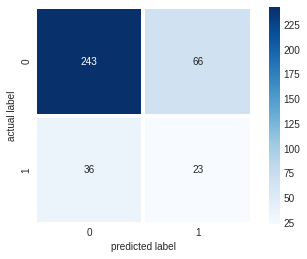

In [ ]:
# Heatmap Confusion matrix
sns.heatmap(cm_tree, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

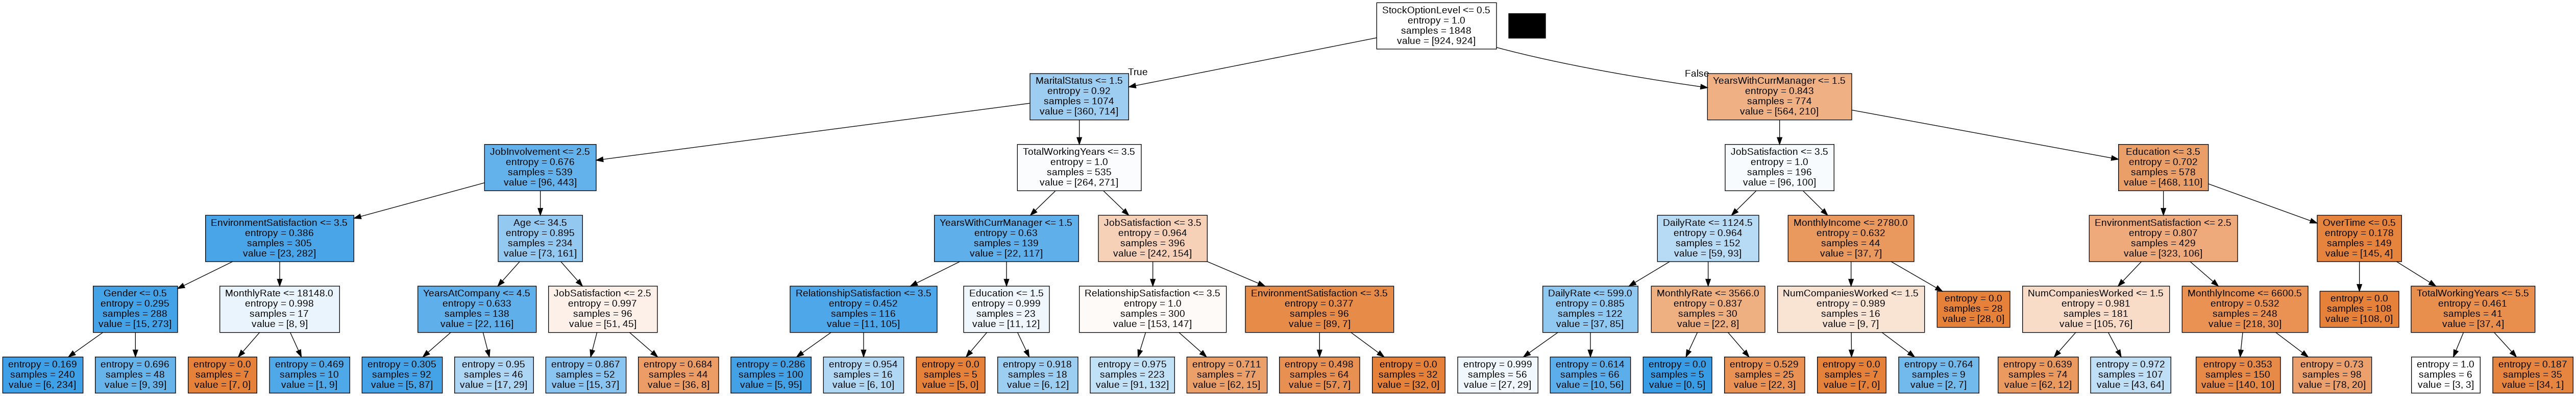

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,min_samples_split= 2, random_state=42)
tree.fit(x_train, y_train)
graph2, = print_tree(tree, features=x.columns)
Image(graph2.create_png())

In [ ]:
#original data
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=11,min_samples_split= 2, random_state=42)
tree.fit(x_train_o, y_train_o)
y_predict = tree.predict(x_test)
tree_accuracy = metrics.accuracy_score(y_test_o, y_predict)
print('Accuracy of Decision Tree = {} '.format(tree_accuracy))

# confusion matrix
print('Confusion matrix: ')
cm_tree = metrics.confusion_matrix(y_test_o, y_predict)
print(cm_tree)

# Recall Score
recall_tree = metrics.recall_score(y_test_o, y_predict)
print('Recall Score: ', recall_tree)

# Precision Score
precision_tree = metrics.precision_score(y_test_o, y_predict)
print("Precision Score: ", precision_tree)

# F1 Score
f1_score_tree = metrics.f1_score(y_test_o, y_predict, average='micro')
print('F1 Score: ', f1_score_tree)

Accuracy of Decision Tree = 0.842391304347826 
Confusion matrix: 
[[297  12]
 [ 46  13]]
Recall Score:  0.22033898305084745
Precision Score:  0.52
F1 Score:  0.8423913043478262
